<a href="https://colab.research.google.com/github/chow33/Applied-Deep-Learning-and-Artificial-Intelligence-Chow-and-Signe/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, you are required to delve into the practical aspects of Deep Learning by constructing and evaluating a neural network using PyTorch. This exercise is designed to deepen your understanding of neural network architectures, hyperparameter tuning, and the preprocessing steps necessary for effective model training and evaluation. You will have the freedom to choose a dataset from either the M1 or M2 module or select an external dataset that intrigues you. By experimenting with different neural network configurations and hyperparameters, you will gain hands-on experience in optimizing ML models to achieve desired performance metrics.

# Task
Build, train, and evaluate a neural network using Pytorch.
The neural network should have a minimum of 2 hidden layers.
Experiment with at least 5 different variations of hyperparameters (e.g., number of layers/neurons, activation functions, epochs, optimizers, learning rates, etc.).
The assignment should include the following steps:

* Feature Selection
* Feature Engineering (if necessary)
* Standard ML Preprocessing (if necessary)
* Train-Test Split
* Defining a Neural Network Architecture in Pytorch
* Defining a Training Loop
* Training the Model
* Experimenting with Different Hyperparameters
* Evaluating the Final Model on the Test Data

In [1]:
# import necessary libraries
import numpy as np  # Matrix and vector computation package
import pandas as pd
import matplotlib.pyplot as plt  # Plotting library
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
import torch
# load dataset
data_raw = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
data_raw.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#Define the scaler and divide cateogrical from numerical data
scaler = MinMaxScaler()
numerical_col = data_raw[['BMI', 'DiabetesPedigreeFunction']]
categorical_col = data_raw.drop(columns=['BMI', 'DiabetesPedigreeFunction'])
#Scaling
data_scaled = scaler.fit_transform(numerical_col)
data_s = pd.DataFrame(data_scaled, columns=['BMI_scaled', 'DiabetesPedigreeFunction_scaled'] )

#Merge back the scaled data with the rest
final_data = pd.concat([categorical_col,data_s], axis=1)
final_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome,BMI_scaled,DiabetesPedigreeFunction_scaled
0,6,148,72,35,0,50,1,0.500745,0.234415
1,1,85,66,29,0,31,0,0.396423,0.116567
2,8,183,64,0,0,32,1,0.347243,0.253629
3,1,89,66,23,94,21,0,0.418778,0.038002
4,0,137,40,35,168,33,1,0.642325,0.943638


In [3]:
final_data.Outcome.value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [4]:
final_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'Age', 'Outcome', 'BMI_scaled', 'DiabetesPedigreeFunction_scaled'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split

X = final_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',"Insulin", "Age", "BMI_scaled", "DiabetesPedigreeFunction_scaled"]].values
y = final_data['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your training data and labels
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the resampled data
# You can split this resampled data into train and validation sets for model training
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

# Train your model on the resampled data

In [7]:
# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [8]:
print(X_train_tensor.shape)
print(y_train_tensor.shape)

torch.Size([641, 8])
torch.Size([641])


In this training model we have used random number of epoch and learning_rate to determined how good the model is. The architecture of our neural network is a 6 layer network with 2 hidden layer from relu and an output layer as Sigmoid to make it binary, which also make the loss function a BCELoss. This model show the average loss on the larger size, which means that the model need some hyperparameter turning.

In [9]:
import torch.nn as nn

# Initializing Hyperparameters
epochs = 20
learning_rate = 3

# # Initializing Parameters

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_1 = nn.Sequential(nn.Linear(8, 10),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),

                                 torch.nn.Linear(10, 4),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.1),

                                 nn.Linear(4, 1),
                                 nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_1.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_1.forward(X_train_tensor[i].reshape(1, 8))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-9-d691abaabe12>:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]


Epoch 1 Average Loss: 48.7219
--------------------------------------------------


Epoch 2 Average Loss: 48.8658
--------------------------------------------------


Epoch 3 Average Loss: 48.0668
--------------------------------------------------


Epoch 4 Average Loss: 45.5792
--------------------------------------------------


Epoch 5 Average Loss: 49.1671
--------------------------------------------------


Epoch 6 Average Loss: 48.0797
--------------------------------------------------


Epoch 7 Average Loss: 47.7672
--------------------------------------------------


Epoch 8 Average Loss: 50.1049
--------------------------------------------------


Epoch 9 Average Loss: 48.7039
--------------------------------------------------


Epoch 10 Average Loss: 46.9870
--------------------------------------------------


Epoch 11 Average Loss: 50.4190
--------------------------------------------------


Epoch 12 Average Loss: 49.9456
--------------------------------------------------




The training model have changed to a smaller learning rate and a change in the neuron, where it is 4 output in the first layer instead of 10 and the second layer has 2 output instead of the 4 from the earlier model. This model have a decent loss function, the only problem being that it converge to a minimum too quickly, which makes the training model bad, as it may not explorer some of the regions in the data and a lower convergence may allow the optimization algorithm to explore a broader range of parameter values, potentially leading to a better solution.

In [10]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 0.1
# # Initializing Parameters
loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_2 = nn.Sequential(nn.Linear(8, 4),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),

                                 torch.nn.Linear(4, 2),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.3),

                                 nn.Linear(2, 1),
                                 nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_2.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_2.forward(X_train_tensor[i].reshape(1, 8))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-10-74d3b664c007>:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 1.1752
--------------------------------------------------


Epoch 2 Average Loss: 0.6998
--------------------------------------------------


Epoch 3 Average Loss: 0.6998
--------------------------------------------------


Epoch 4 Average Loss: 0.6997
--------------------------------------------------


Epoch 5 Average Loss: 0.6997
--------------------------------------------------


Epoch 6 Average Loss: 0.6997
--------------------------------------------------


Epoch 7 Average Loss: 0.6997
--------------------------------------------------


Epoch 8 Average Loss: 0.6997
--------------------------------------------------


Epoch 9 Average Loss: 0.6997
--------------------------------------------------


Epoch 10 Average Loss: 0.6997
--------------------------------------------------



Model 2 had the problem of converging too fast, which may have been because of overfitting. This time the learning rate has been decreased by a lot to make sure the training model does not converge too fast, and a change in neurons has been added to represent the 8 inputs. This model have a fine loss function and with a slow convergence, which means the model is still working in other epochs.

In [13]:
# Initializing Hyperparameters
epochs = 15
learning_rate = 0.001
# # Initializing Parameters
loss_set_3 = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_3 = nn.Sequential(nn.Linear(8, 20),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),

                                 torch.nn.Linear(20, 10),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.1),

                                 nn.Linear(10, 1),
                                 nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_2.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_2.forward(X_train_tensor[i].reshape(1, 8))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set_3[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-13-86f60834b280>:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/15 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.6933
--------------------------------------------------


Epoch 2 Average Loss: 0.6933
--------------------------------------------------


Epoch 3 Average Loss: 0.6933
--------------------------------------------------


Epoch 4 Average Loss: 0.6933
--------------------------------------------------


Epoch 5 Average Loss: 0.6933
--------------------------------------------------


Epoch 6 Average Loss: 0.6933
--------------------------------------------------


Epoch 7 Average Loss: 0.6933
--------------------------------------------------


Epoch 8 Average Loss: 0.6933
--------------------------------------------------


Epoch 9 Average Loss: 0.6933
--------------------------------------------------


Epoch 10 Average Loss: 0.6933
--------------------------------------------------


Epoch 11 Average Loss: 0.6933
--------------------------------------------------


Epoch 12 Average Loss: 0.6933
--------------------------------------------------


Epoch 13 Ave

This plot shows the decreasing average loss in the training model

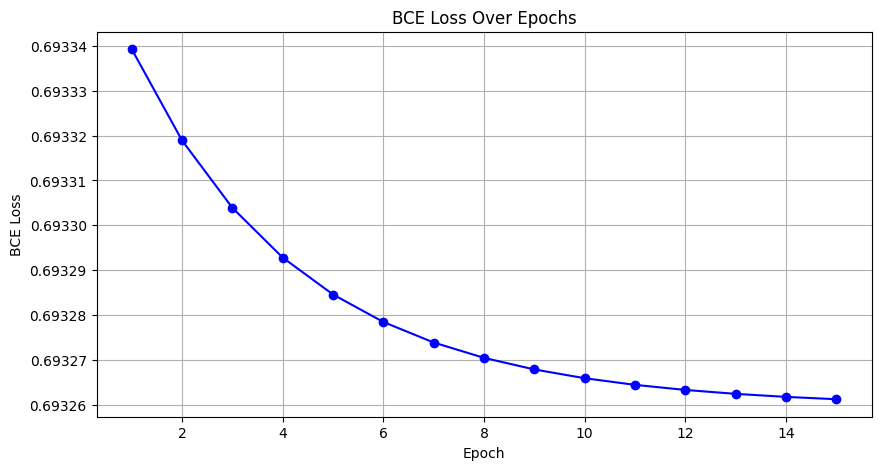

In [14]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set_3[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

The training model is saved and all the layers can be seen.

In [15]:
# Now lets save our trained model
# save the trained model
torch.save(model_2, 'model_2.pkl')
torch.save(model_3, 'model_3.pkl')

In [ ]:
# Lets load the model for inference
model_2_trained = torch.load('model_2.pkl')
model_3_trained = torch.load('model_3.pkl')

# Set the Model to Evaluation Mode
model_2_trained.eval()
model_3_trained.eval()

In [17]:
output

tensor([[0.4966]], grad_fn=<SigmoidBackward0>)

The training model prediction is then compared to the test data, which shows how the predicted probabilities for each sample.

In [18]:
# Initialize a variable to store the total loss
total_loss = 0.0

# Initialize a variable to store all the predictions
all_predictions = []

# Loop over each sample in the test dataset
for i in range(X_test_tensor.size(0)):

    # Forward pass: compute predicted y by passing x to the model
    output = model_3(X_test_tensor[i].reshape(-1))

    # Compute and print loss
    loss = loss_BCE(output, y_test_tensor[i].reshape(-1))
    total_loss += loss.item()

    # Store the predictions
    all_predictions.append(output.detach().numpy())

# Calculate the average loss over all test samples
average_loss = total_loss / X_test_tensor.size(0)
print(f'Average Loss on Test Set: {average_loss:.4f}')

# Convert all_predictions to a tensor for further calculations
all_predictions_tensor = torch.tensor(all_predictions).squeeze()

Average Loss on Test Set: 1.2087


<ipython-input-18-6b17d134d1bd>:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  all_predictions_tensor = torch.tensor(all_predictions).squeeze()


In [19]:
all_predictions_tensor

tensor([0.9521, 0.4171, 0.4884, 0.5515, 0.4083, 0.9915, 0.8826, 0.0428, 0.9556,
        0.1190, 0.0291, 0.7728, 0.8929, 0.8682, 0.3219, 0.8882, 0.4336, 0.1004,
        0.0474, 0.9372, 0.2442, 0.9046, 0.0853, 0.9273, 0.8773, 0.1176, 0.3156,
        0.2061, 0.9923, 0.9196, 0.8976, 0.0545, 0.9954, 0.0426, 0.1284, 0.9837,
        0.0027, 0.0731, 0.2888, 0.0541, 0.8084, 0.2385, 0.1062, 0.4826, 0.0456,
        0.0816, 0.9739, 0.0570, 0.1550, 0.7953, 0.4620, 0.9936, 0.9987, 0.5976,
        0.5253, 0.8261, 0.0582, 0.1599, 0.9647, 0.1212, 0.2923, 0.4899, 0.9836,
        0.7334, 0.9761, 0.0657, 0.6608, 0.5003, 0.4807, 0.9980, 0.9958, 0.3380,
        0.2519, 0.9230, 0.5714, 0.8129, 0.3388, 0.4656, 0.0801, 0.6194, 0.2166,
        0.3046, 0.9512, 0.9846, 0.4141, 0.9370, 0.1993, 0.9767, 0.3429, 0.2286,
        0.9250, 0.3147, 0.5161, 0.0809, 0.9662, 0.1170, 0.4355, 0.0960, 0.9621,
        0.0409, 0.8053, 0.7932, 0.0331, 0.9783, 0.3922, 0.2229, 0.8973, 0.9672,
        0.9491, 0.1799, 0.5136, 0.3871, 

Creating a Confusion Matrix and seeing the predictibility of the training model.

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools


In [21]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[66 33]
 [30 25]]


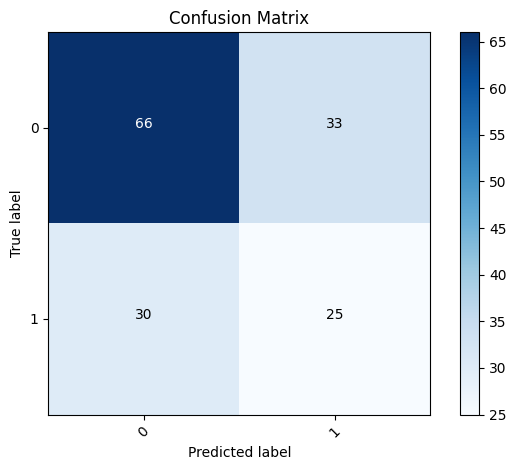

In [25]:
# Convert predicted probabilities to binary labels
threshold = 0.7
predicted_labels = (all_predictions_tensor > threshold).long()

# Calculate confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), predicted_labels.numpy())

# Plot confusion matrix
plot_confusion_matrix(cm, classes=[0, 1], title='Confusion Matrix')
plt.show()

In [23]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.5909090909090909

In [24]:
# Print the parameters of all layers
for name, param in model_3_trained.named_parameters():
    print(f"Layer: {name}")
    print(f"Size: {param.size()}")
    print(f"Values: \n{param.data}\n")

Layer: 0.weight
Size: torch.Size([20, 8])
Values: 
tensor([[-0.3524, -0.2709,  0.2674,  0.2854, -0.2843, -0.1934, -0.2651, -0.0282],
        [-0.1205, -0.0398,  0.2429,  0.2766,  0.2551, -0.2669, -0.1826, -0.2611],
        [ 0.1503,  0.2835, -0.3010,  0.0803,  0.1045, -0.1993, -0.1134, -0.3235],
        [ 0.0976, -0.0077,  0.2585,  0.1258,  0.2922, -0.2990, -0.2092, -0.2275],
        [ 0.2165, -0.0129, -0.0085, -0.3346, -0.1466, -0.1421,  0.0237, -0.1143],
        [-0.2325,  0.0573,  0.0292,  0.2149,  0.2621,  0.1136, -0.0734, -0.0653],
        [ 0.1653, -0.0375,  0.3068,  0.1938, -0.0647,  0.0550, -0.2572,  0.1020],
        [-0.1210,  0.3017,  0.2357, -0.1614, -0.0384,  0.0576,  0.0445,  0.3340],
        [ 0.0713, -0.0267,  0.2439,  0.0367, -0.1711,  0.2242,  0.0682, -0.2145],
        [ 0.0307,  0.0332, -0.1322,  0.2508, -0.2393,  0.1517, -0.2651,  0.3494],
        [ 0.1347,  0.0076, -0.1260,  0.0752, -0.1134,  0.2516, -0.2895, -0.2149],
        [ 0.0822, -0.0260, -0.2685, -0.2212,  0